In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

artists = pd.read_csv('./data/artists.csv')
artworks = pd.read_csv('./data/artworks.csv')

## ARTISTS

## Age

In [174]:
# substracting Birth Year from Death year to get artists Age at the time of death
artists['Age'] = artists['Death Year'] - artists['Birth Year']

### Which artists in the collection have lived for over a century?

In [175]:
artists[artists['Age'] >= 100].sort_values(by="Age", ascending=False).head(5)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
12486,38294,"Union Paper Bag Machine Company, Philadelphia, PA",NaN,NaN,1869.0,1999.0,130.0
9164,23931,B. Efimov,Russian,Male,1900.0,2008.0,108.0
3449,3844,Leni Matthaei,German,Female,1873.0,1981.0,108.0
13568,43532,Manoel de Oliveira,Portuguese,NaN,1908.0,2015.0,107.0
9306,24431,Horacio Coppola,Argentine,Male,1906.0,2012.0,106.0


#### NOTE: the first row represents a company, not an individual

### What is the average and median age at the time of artists death?


In [176]:
average_age = artists['Age'].mean()
median_age = artists["Age"].median()
print("Average age:", average_age)
print("Median age:", median_age)

Average age: 72.32501095050372
Median age: 75.0


### How is the distribution of ages at the time of artists' death represented on a chart?

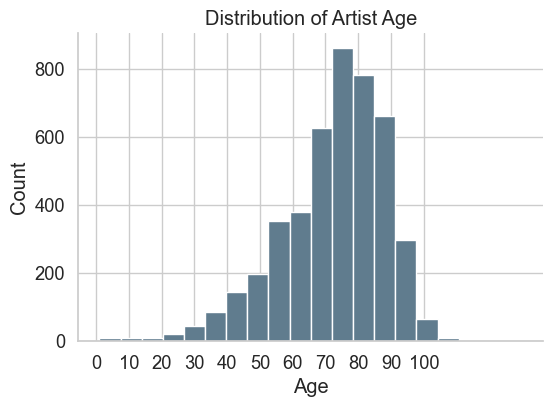

In [177]:
artists_age = artists.dropna(subset=['Age'])
# histogram plot
sns.set(style='whitegrid', font_scale=1.2)  
plt.figure(figsize=(6, 4))  
plt.hist(artists_age['Age'], bins=20, color='#607c8e', edgecolor='white') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Distribution of Artist Age')  
plt.xticks(range(0, 101, 10))  
sns.despine()  

plt.show()  

#### The bell-shaped curve suggests that most artists lived until their seventies, with the median age of death being 75.0 years

## Gender

### How many artists in the collection are male and how many are female?

In [178]:
artists['Gender'] = artists['Gender'].str.lower()
artist_gender = artists['Gender'].value_counts()
artist_gender

Gender
male      9826
female    2193
Name: count, dtype: int64

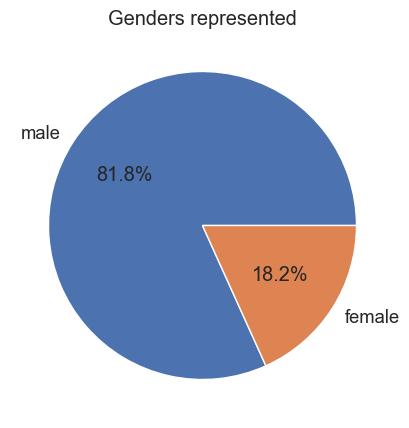

In [179]:
# pie plot
plt.figure(figsize=(5, 5))  
plt.pie(artist_gender, labels=artist_gender.index.tolist(), autopct='%1.1f%%') 
plt.title("Genders represented") 

plt.show() 

#### The fact that 81.8% of artists in MoMA's collection are male suggests a gender imbalance in the art world.

## Gender & Age

### Which gender has a higher average lifespan among artists?

In [180]:
male_artists = artists[artists['Gender'] == 'male']['Age'].mean()
female_artists = artists[artists['Gender']== 'female']['Age'].mean()
print(f'Average age of male artists is {male_artists} years')
print(f'Average age of female artists is {female_artists} years')

Average age of male artists is 72.43200202224469 years
Average age of female artists is 75.53754940711462 years


#### Female artists on average live 3.03 years longer than male artists

## Nationality


### Which nationalities are most represented among the artists in the collection?

In [181]:
top_nationalities = artists['Nationality'].value_counts()[:5]
top_nationalities

Nationality
American    5198
German       930
French       839
British      835
Italian      531
Name: count, dtype: int64

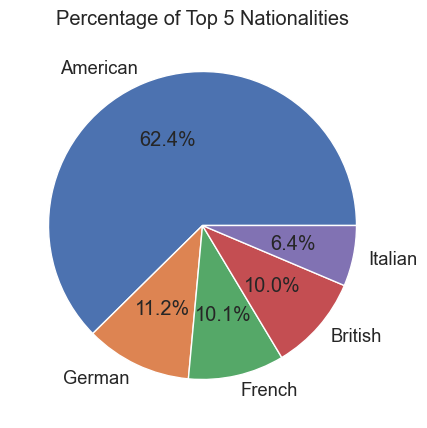

In [182]:
# pie plot
plt.figure(figsize=(7, 5))  
plt.pie(top_nationalities, labels=top_nationalities.index.tolist(), autopct='%1.1f%%') 
plt.title('Percentage of Top 5 Nationalities') 

plt.show() 


#### Out of the top 5 nationalities represented in the collection, 62.4% are American artists.

## Nationality & Gender

### How many male and female artists are there for each of the top 5 nationalities represented in MoMA's collection?

In [183]:
nationality_gender = artists.groupby(['Nationality', 'Gender']).size().unstack()
nationality_gender_top_5 = nationality_gender.loc[top_nationalities.index]

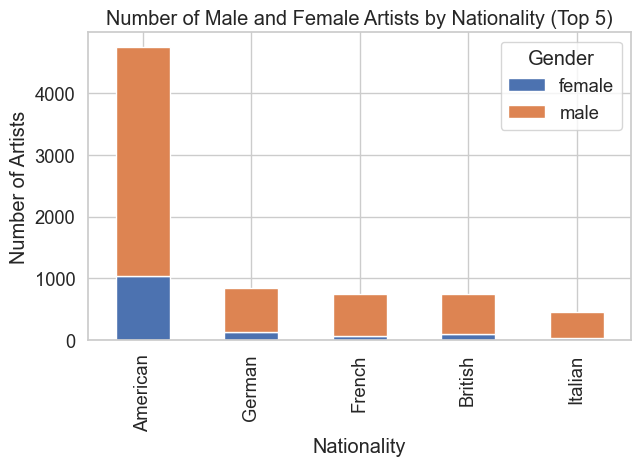

In [184]:
nationality_gender_top_5.plot(kind='bar', stacked=True, figsize=(7, 4))

plt.title('Number of Male and Female Artists by Nationality (Top 5)')
plt.xlabel('Nationality')
plt.ylabel('Number of Artists')

plt.show()

#### Male artists from various nationalities hold a prominent position in MoMA's collection

## ARTWORKS

### What is the total number of artworks in MoMA's collection?

In [185]:
artworks['Artwork ID'].shape[0]

130262

### How does the museum primarily acquire artworks for their collection?

In [186]:
cred = artworks['Credit'].value_counts()[:3]

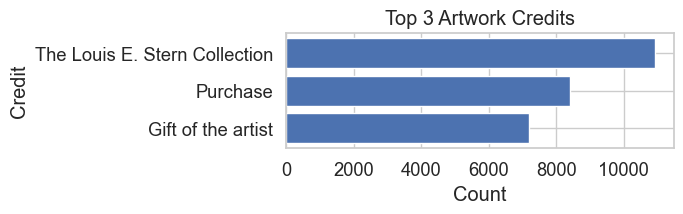

In [187]:
plt.figure(figsize=(5,1.5))
plt.barh(cred.index, cred.values)
plt.title('Top 3 Artwork Credits')
plt.xlabel('Count')
plt.ylabel('Credit')
plt.gca().invert_yaxis()
plt.show()

#### Aside from purchasing, the museum also acquires artworks through donations from big collectors and gifts from artists themselves.

### What are the top 10 classifications/mediums represented in MoMA's collection?

In [188]:
classifications = artworks['Classification'].value_counts().head(10)

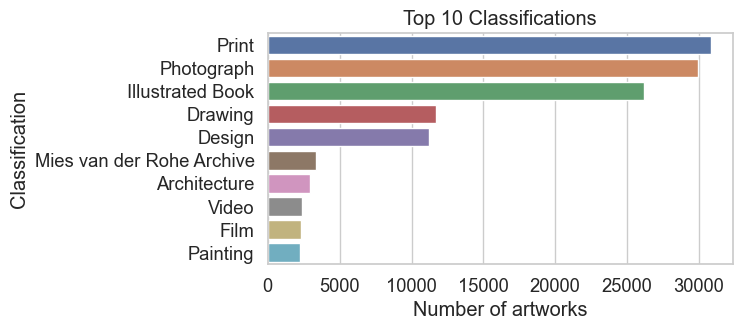

In [189]:
# bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=classifications.values, y=classifications.index)
plt.xlabel('Number of artworks')
plt.xticks(rotation=0)
plt.title('Top 10 Classifications')
plt.show()

#### The collection has a strong emphasis on graphic arts, particularly prints, photographs, and illustrated books, with these three categories making up a majority of the collection. The collection also includes a significant number of drawings and design works. Painting, on the other hand, appears to be a relatively smaller portion of the collection.

### How long of a wall would be required to display all the *prints* in the collection, assuming the wall has a height of 2 meters?

In [ ]:
prints = artworks[artworks['Classification']=='Print']
artworks.loc[:, 'Size'] = prints['Height (cm)'] * prints['Width (cm)'] # multiply Height and Width to get prints Size
artworks['Size'].dropna() # drop all NaN values

In [191]:
sum_of_print_sizes = artworks['Size'].sum() # total size of prints (cm)
wall_height = 200 # cm
res = sum_of_print_sizes / wall_height
res / 100000 # convert to km

2.8214960053486386

#### We divide the total size of prints by the height of the wall which results in approximately 2821.5 meters (or 2.8 kilometers) of wall length required.  Therefore, to display all the prints on a wall that is 2 meters high, we would need a wall that is approximately 2.8 kilometers long.

## ARTISTS & ARTWORKS

### Who are the top 10 artists with greatest number of artworks?

In [192]:
artists_and_artworks = pd.concat([artists,artworks],join='inner',keys='Artist ID')
top_artists = artists_and_artworks['Name'].value_counts()[:10]

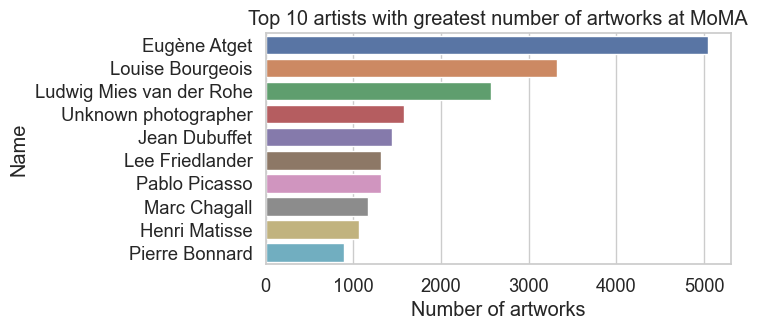

In [193]:
# bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.xlabel('Number of artworks')
plt.xticks(rotation=0)
plt.title('Top 10 artists with greatest number of artworks at MoMA')
plt.show()

#### The fact that the top 10 artists with the most artworks in MoMA's collection come from different nationalities, with 5 from France, 3 from the United States, and 1 from Spain, is noteworthy. Additionally, despite the smaller representation of female artists, the second-ranked on the list is Louise Bourgeois, a female artist.

## Artworks & Nationalities

### What is the percentage breakdown of artworks created by American artists versus artists of other nationalities?

In [194]:
cp = artists.copy() # making a copy of artists dataframe
cp['Artist ID'] = cp['Artist ID'].astype(str) # convert Artist ID column to string
aa_merged = pd.merge(cp, artworks, on='Artist ID') # merging artists with artworks by Artist ID 


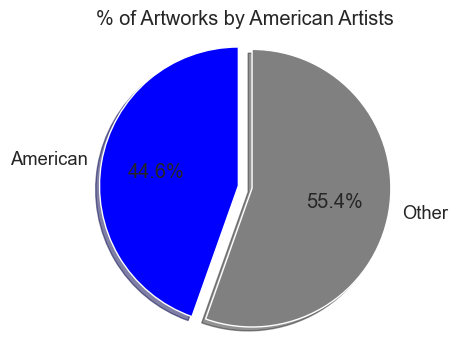

In [195]:
american_count = aa_merged[aa_merged['Nationality'] == 'American'].shape[0]
sizes = [american_count, aa_merged.shape[0] - american_count] 
labels = ['American', 'Other']
colors = ['blue', 'gray']
explode = (0.1, 0)

# pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('% of Artworks by American Artists')
plt.show()


#### While the majority of artists in MoMA's collection are American (62%), the majority of artworks in the collection are actually created by artists of other nationalities, with American artists contributing 44.6% of the artworks and artists of other nationalities contributing 55.4%. 

## Artworks & Gender

### How many artworks in MoMA's collection are done by male and how many by female artists?

In [196]:
artworks_gender = aa_merged[['Gender']].value_counts()
artworks_gender

Gender
male      99984
female    16193
Name: count, dtype: int64

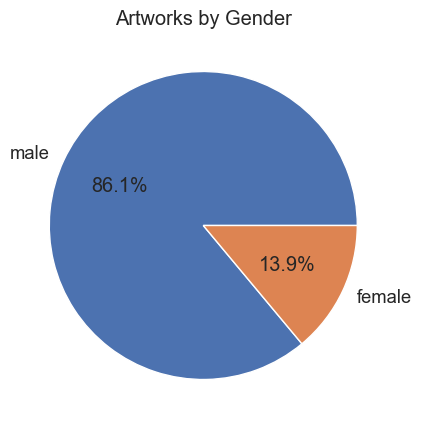

In [197]:
# pie plot
plt.figure(figsize=(5, 5))  
plt.pie(artworks_gender, labels=artist_gender.index.tolist(), autopct='%1.1f%%') 
plt.title("Artworks by Gender") 

plt.show() 

#### Only 13.9% of the artworks in MoMA's collection are created by female artists.

## Gender & Art Departmant

### Which gender is predominant in all art departments in MoMA's collection?

In [198]:
department_and_gender = aa_merged.groupby(['Gender', 'Department']).size().unstack()

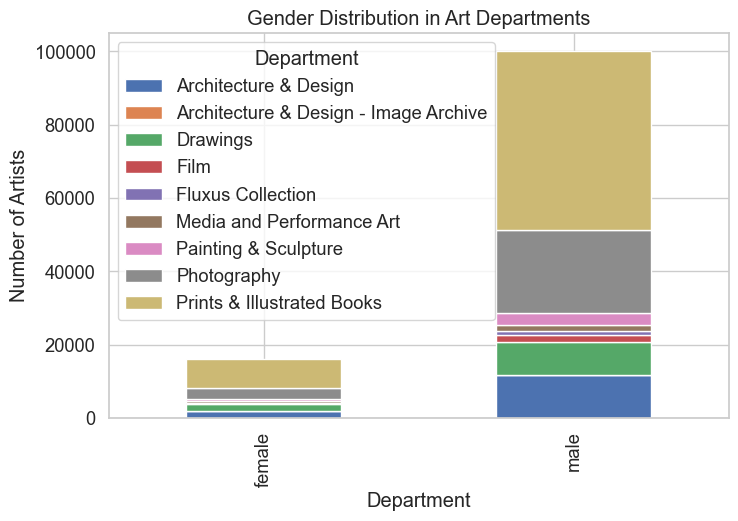

In [199]:
department_and_gender.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.title('Gender Distribution in Art Departments')
plt.xlabel('Department')
plt.ylabel('Number of Artists')

plt.show()

#### In all art departments, male artists are the dominating force, including the most prominent departments, Prints & Illustrated Books, Photography and Architecture & Design.